In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from scipy.interpolate import interp1d
from natsort import natsorted
import os

PX_PER_MM = 7.532343134764206
FRAME_PER_SECOND = 60

COLOR = 'black'
plt.style.use("default")
rcParams["font.family"] = "serif"
rcParams["mathtext.fontset"] = "cm"
rcParams['figure.figsize'] = (28, 18)
rcParams['figure.titlesize'] = 20
rcParams['figure.dpi'] = 50
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = 'lightgray'
rcParams['legend.fontsize'] = 25
rcParams['axes.titlesize'] = 60
rcParams['axes.labelsize'] = 50
rcParams['ytick.labelsize'] = 20
rcParams['xtick.labelsize'] = 20
rcParams['text.color'] = COLOR
rcParams['text.color'] = COLOR
rcParams['axes.labelcolor'] = COLOR
rcParams['xtick.color'] = COLOR
rcParams['ytick.color'] = COLOR
rcParams['grid.color'] = COLOR
rcParams['text.latex.preamble'] = "\n".join([
    r'\usepackage[version=3]{mhchem}'
])

In [8]:
#We prepare a dataframe of all our filenames and a dataframe of all our csv's
csv_names = [filepath for filepath in os.listdir('ECO20-45mm') if '.csv' in filepath]
filenamelist = pd.DataFrame().assign(name = csv_names)
df_data = [pd.read_csv(f'ECO20-45mm/{f}') for f in filenamelist['name']]

### x(t), y(t)

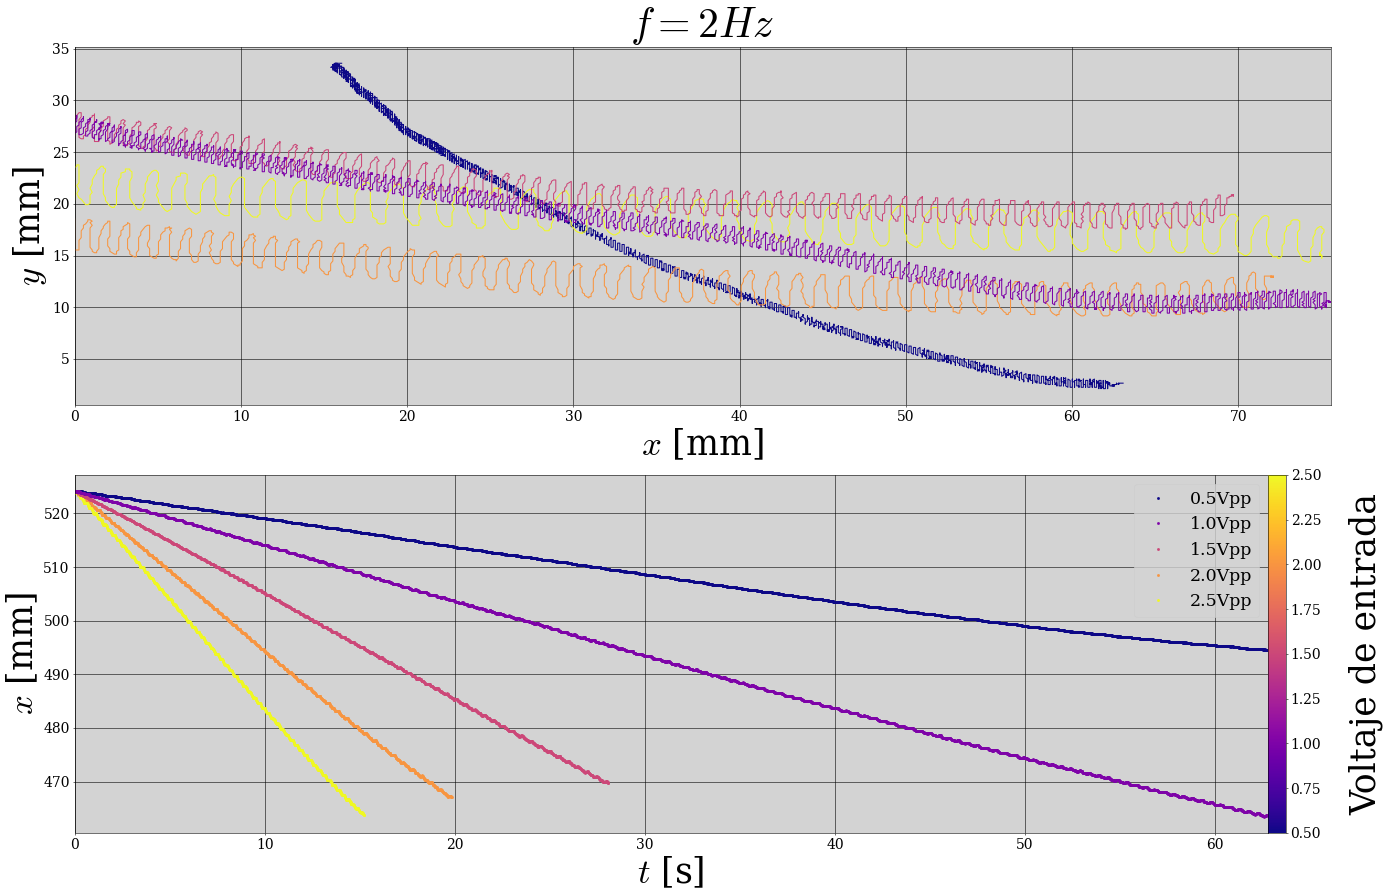

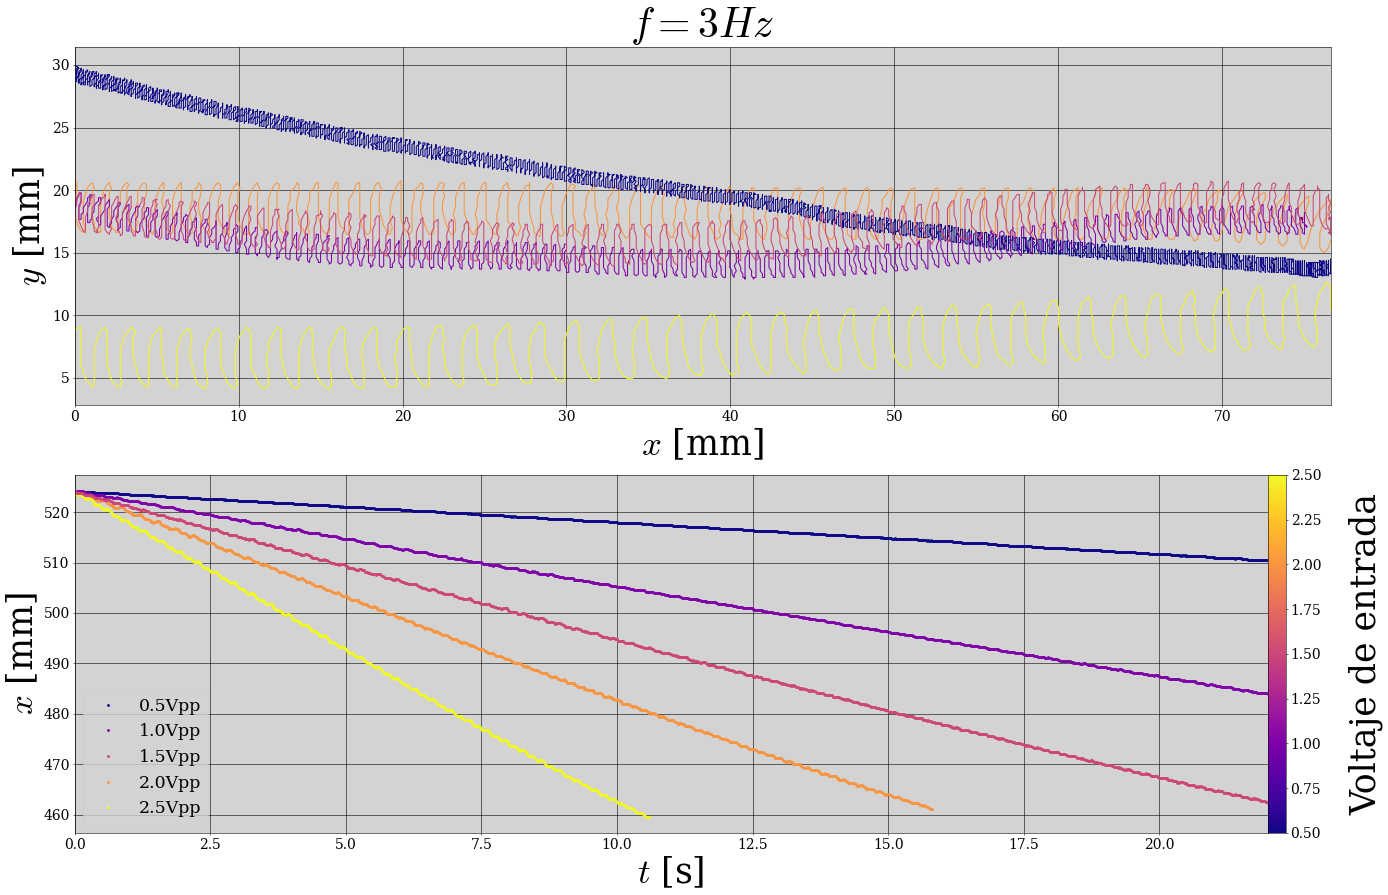

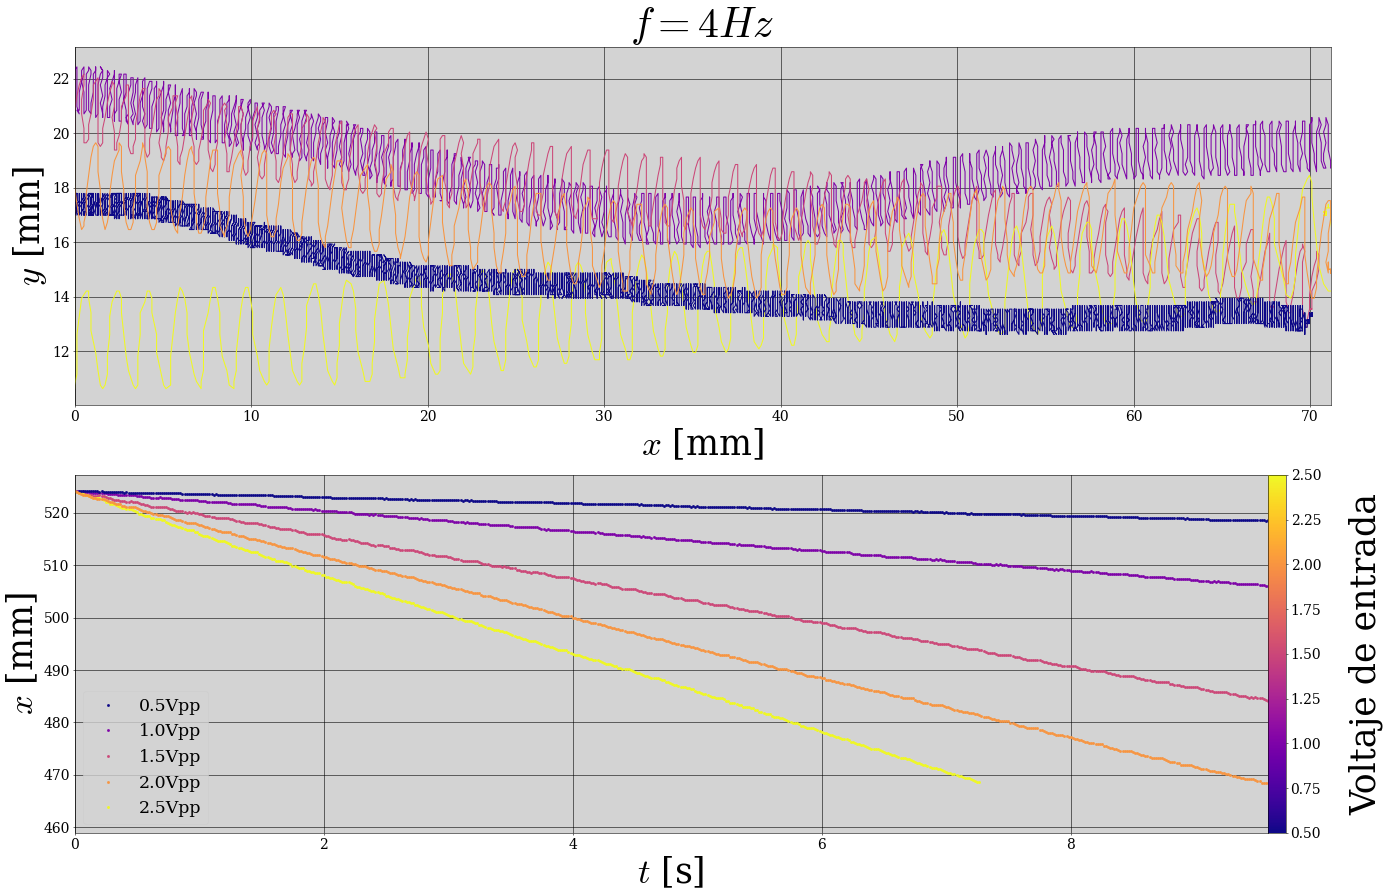

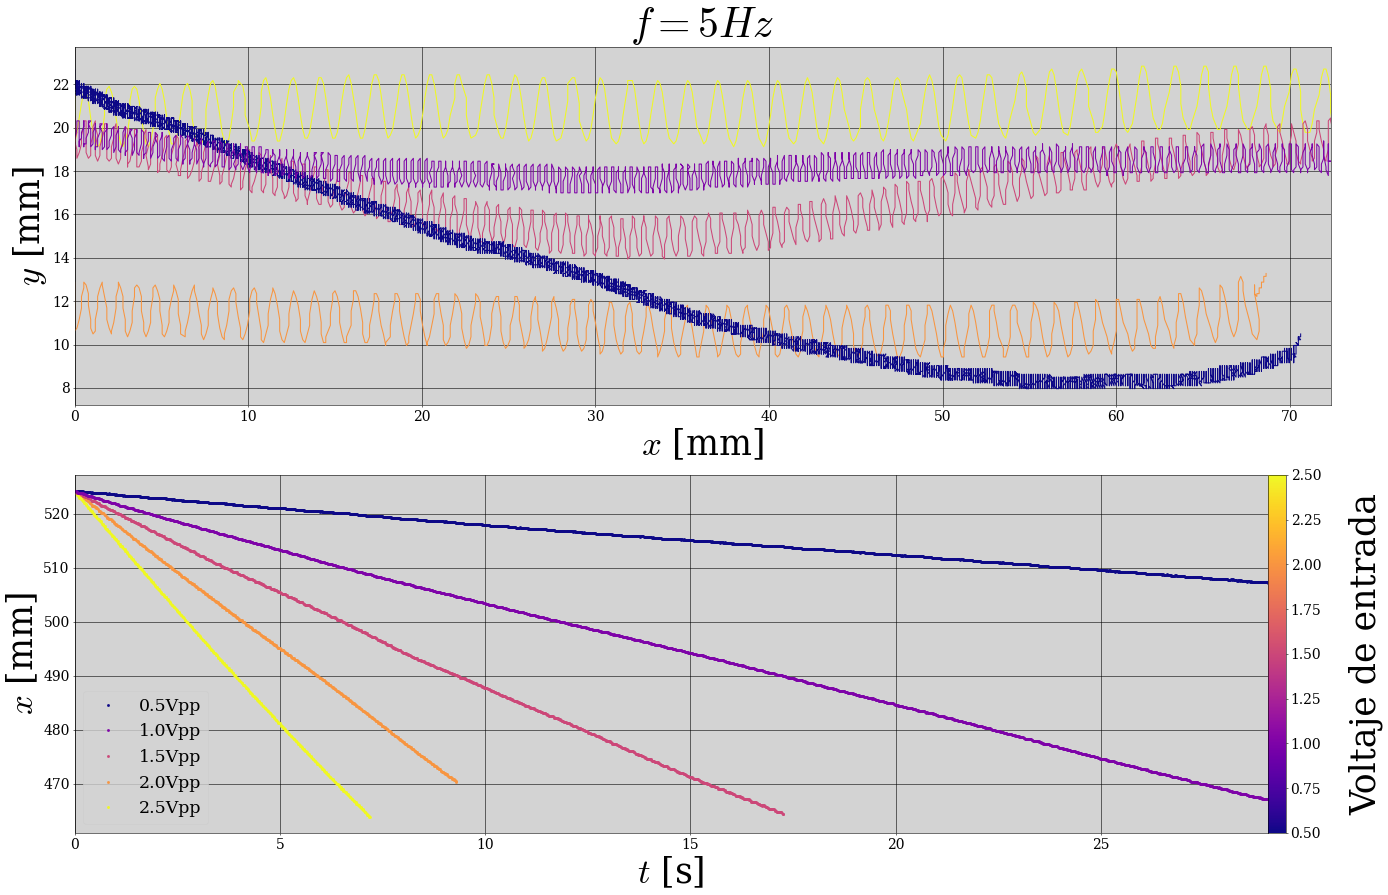

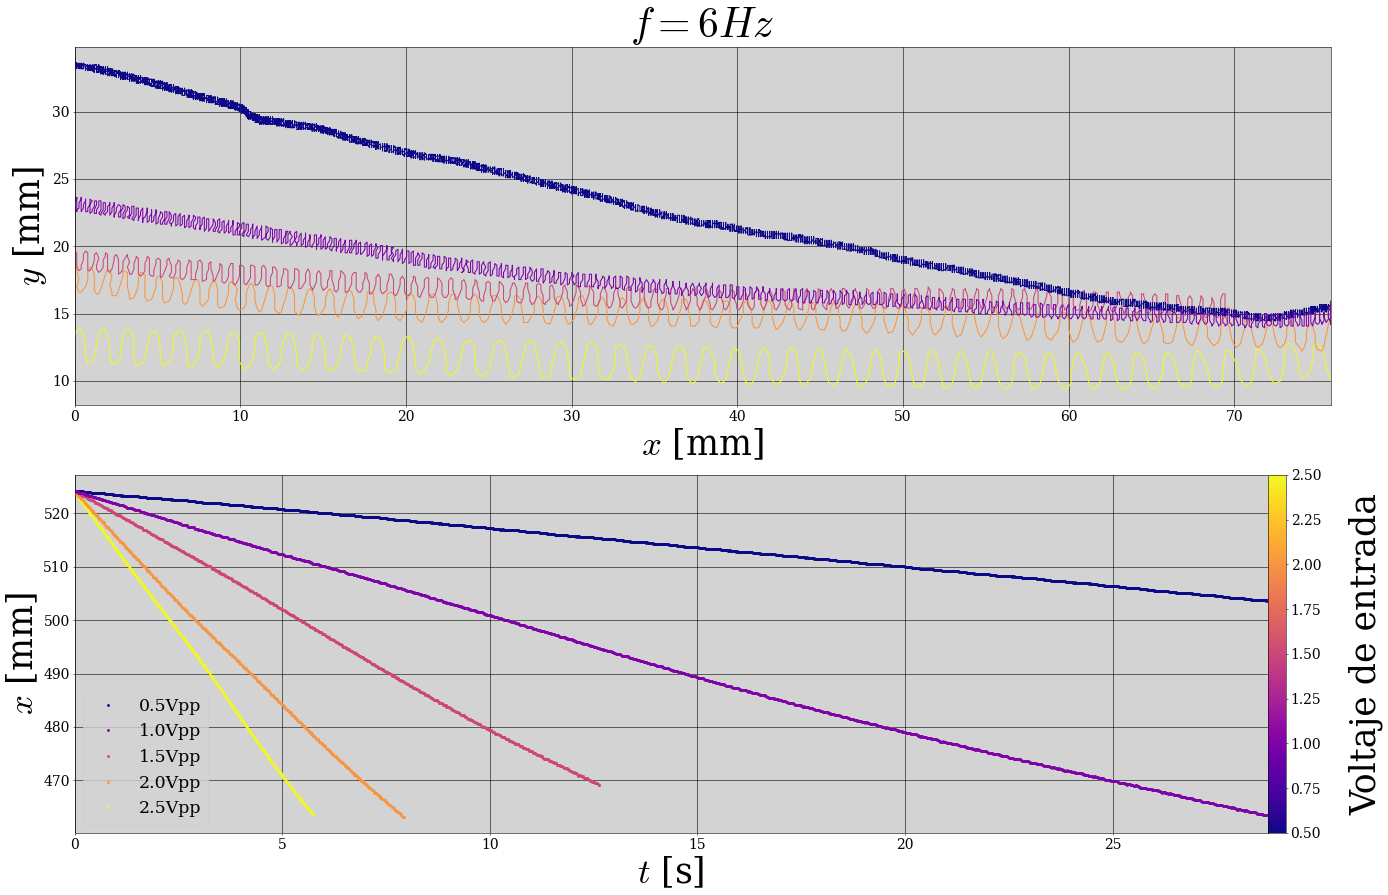

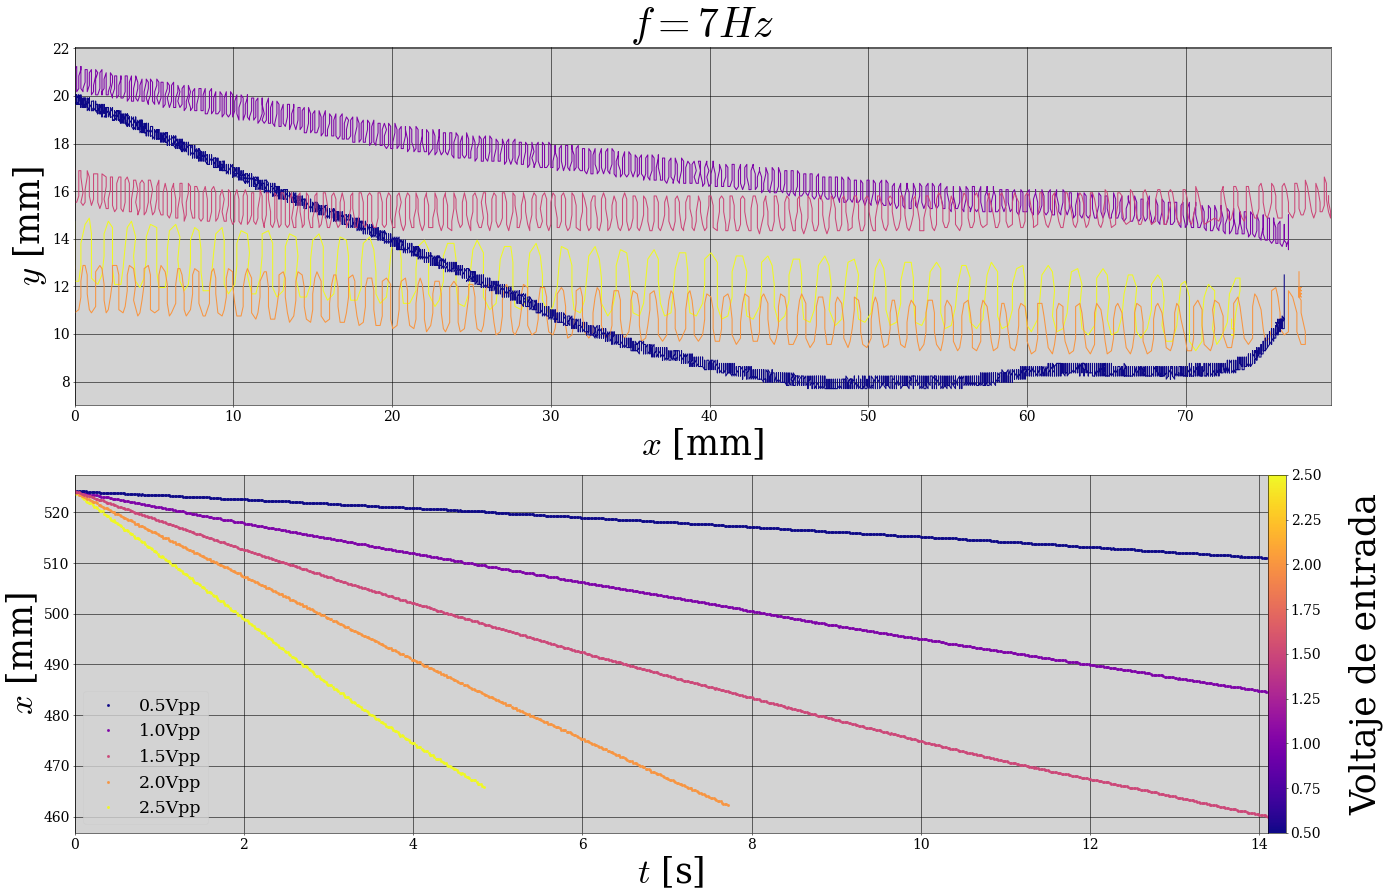

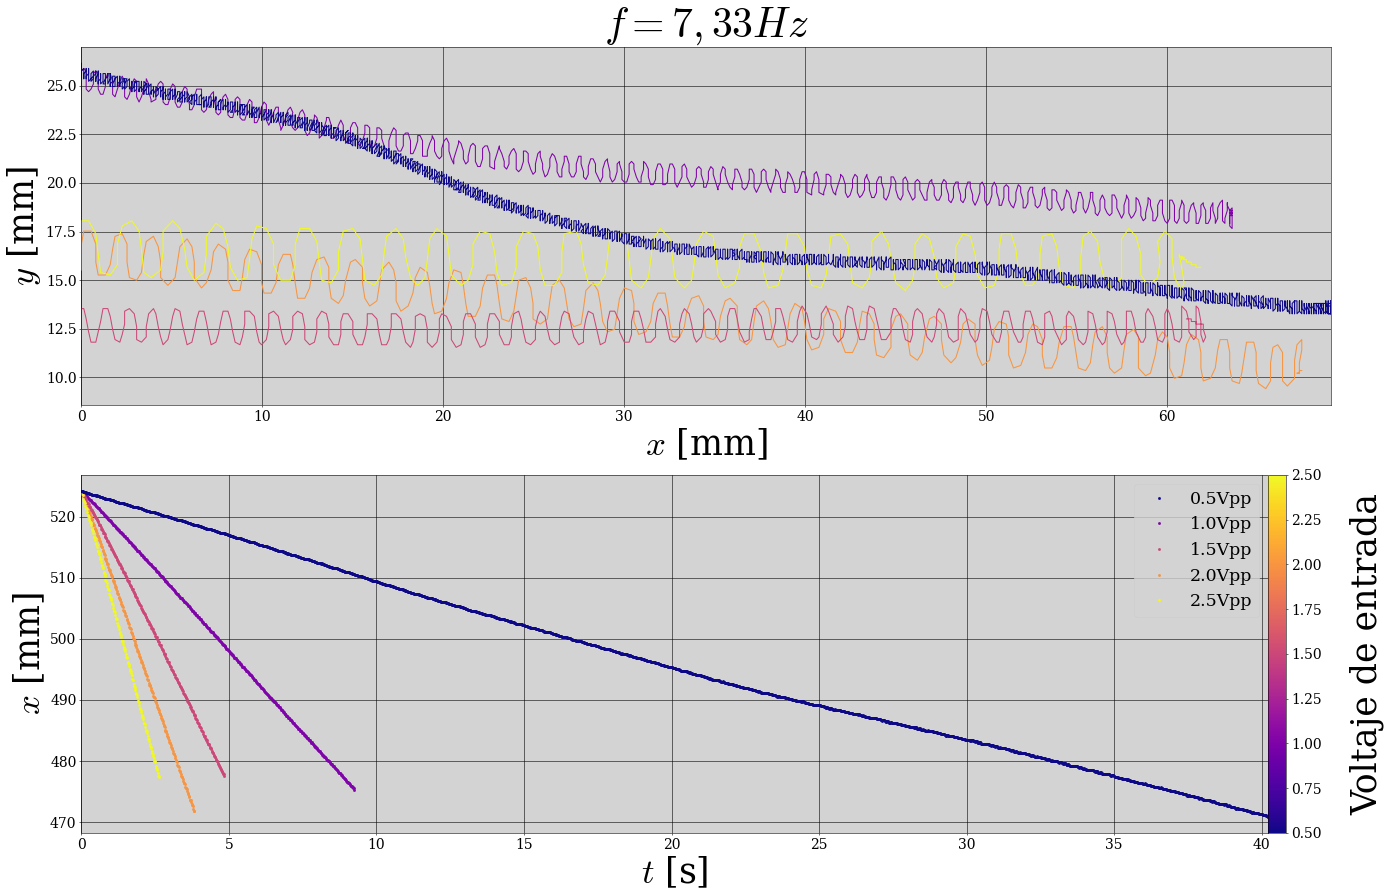

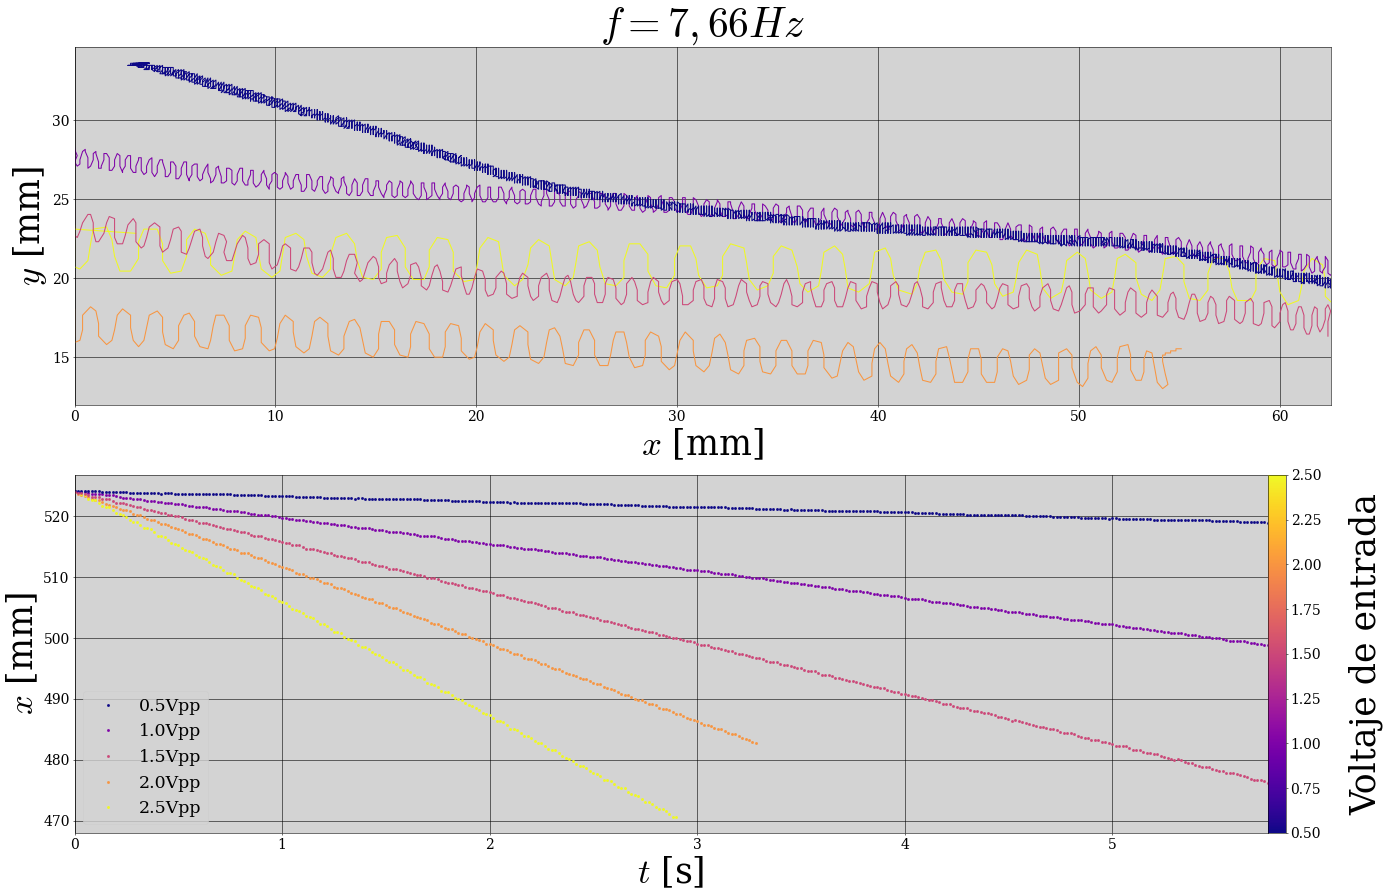

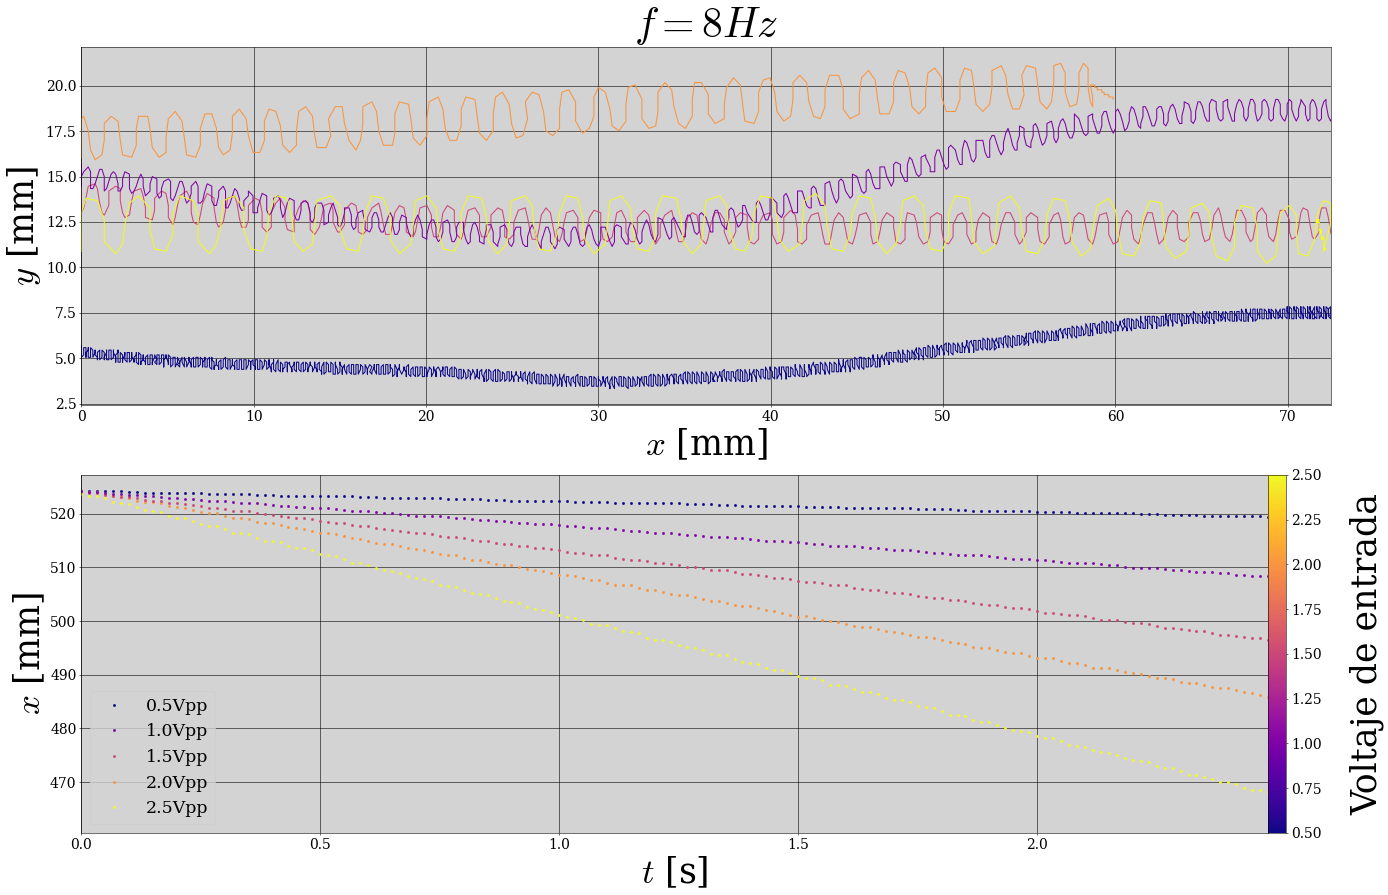

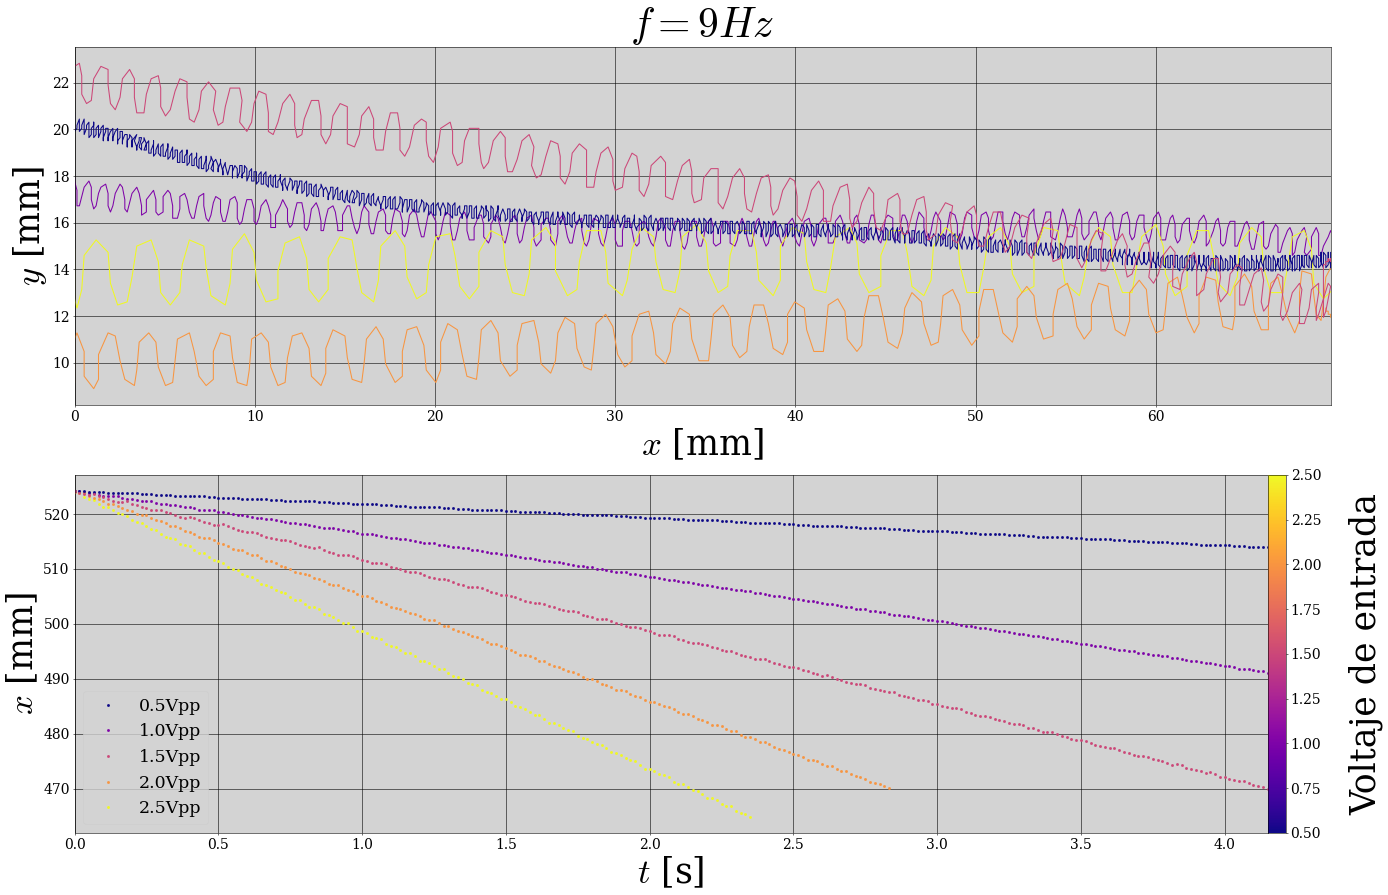

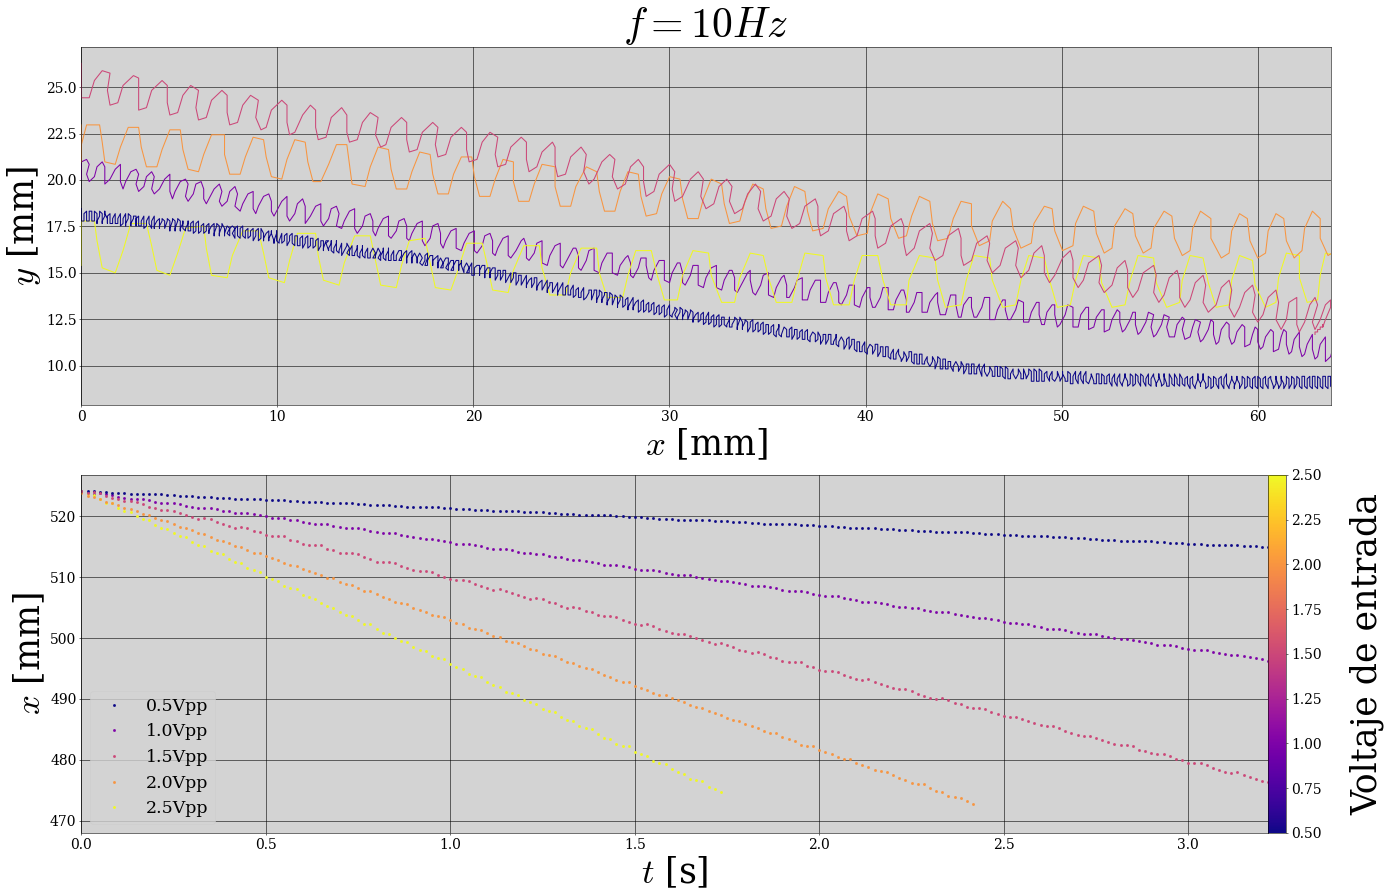

In [13]:
#Creating the colormap
norm = plt.Normalize(0.5,2.5)
cmap = plt.colormaps.get_cmap('plasma')
colorscale = plt.cm.ScalarMappable(norm, cmap)

currHz_array = ['2Hz','3Hz','4Hz','5Hz','6Hz','7Hz','7,33Hz','7,66Hz','8Hz','9Hz','10Hz'] #We create a frecuency array

for currHz in currHz_array:
    df_namelist = filenamelist[filenamelist['name'].str.contains(r'\b'+currHz+r'\b')] #We get the filenames corresponding to the frecuency chosen
    filtered_namelist = df_namelist['name'] #We get the names of those files
    avg_start = np.average([i['x'][0] for i in  df_data]) #We compute the average x-position to make them run all from the same spot.
    #We plot everything on the same two plots
    fig, [ax1, ax2] = plt.subplots(2, 1)

    for filename in filtered_namelist:
        
        df_txy = df_data[ df_namelist[df_namelist['name']==filename].index[0] ] #We retrieve the dataframe corresponding to our current filename
        
        #We retrieve the metadata of our measurements from the filename
        s = filename.split('.')[0].split('-')
        v,f = s[0],s[1]
        vval = (float(v.split('V')[0].replace(',','.')) if 'mV' not in v else float(v.split('mV')[0].replace(',','.'))*1e-3)
        
        #We retrieve the data from our dataframe
        t,x,y = df_txy['t']/FRAME_PER_SECOND, df_txy['x']/PX_PER_MM, df_txy['y']/PX_PER_MM
        
        #We center our x-positions
        x_recentered = x - (x[0]-avg_start)
        
        nonconstant_indexs = np.where(x_recentered<=avg_start*0.98)[0]
        
        x_nonconstant = x_recentered[nonconstant_indexs]
        t_nonconstant = t[nonconstant_indexs] - t[nonconstant_indexs[0]]
        
        #We take out the last part of the movement when the swimmer stops
        last_index = int(np.round(len(x_nonconstant)*0.9))
        t_nonconstant = t_nonconstant[:last_index]
        x_nonconstant = x_nonconstant[:last_index]

        
        #Plotting
        ax1.plot(x, y, color = cmap(norm(vval)) )
        ax2.plot(t_nonconstant, x_nonconstant , '.',label=f'{vval}Vpp', color = cmap(norm(vval)) )  
            
    #Colorbar configuration
    cbar_term = fig.colorbar(colorscale, ax=ax2, location='right', orientation='vertical', pad=0, fraction=0.05)
    cbar_term.ax.set_ylim(0.5,2.5)
    cbar_term.ax.ticklabel_format(axis='x',style='sci',scilimits=(0,2))
    cbar_term.ax.set_ylabel('Voltaje de entrada',labelpad=40)

    #Axes configuration
    ax1.set_xlabel('$x$ [mm]')
    ax1.set_ylabel('$y$ [mm]')
    ax1.set_title(f'$f={currHz}$')
    ax1.set_xlim([0,max(x)])

    ax2.set_xlabel('$t$ [s]')
    ax2.set_ylabel('$x$ [mm]')
    ax2.set_xlim([0,max(t_nonconstant)])
    
    handles, labels = ax2.get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    ax2.legend(handles, labels)
    
    fig.tight_layout()
    # fig.savefig(f'{currHz}-comparacion.svg', bbox_inches='tight')
    # fig.savefig(f'{currHz}-comparacion.png', bbox_inches='tight')

### Agrupación por Voltaje

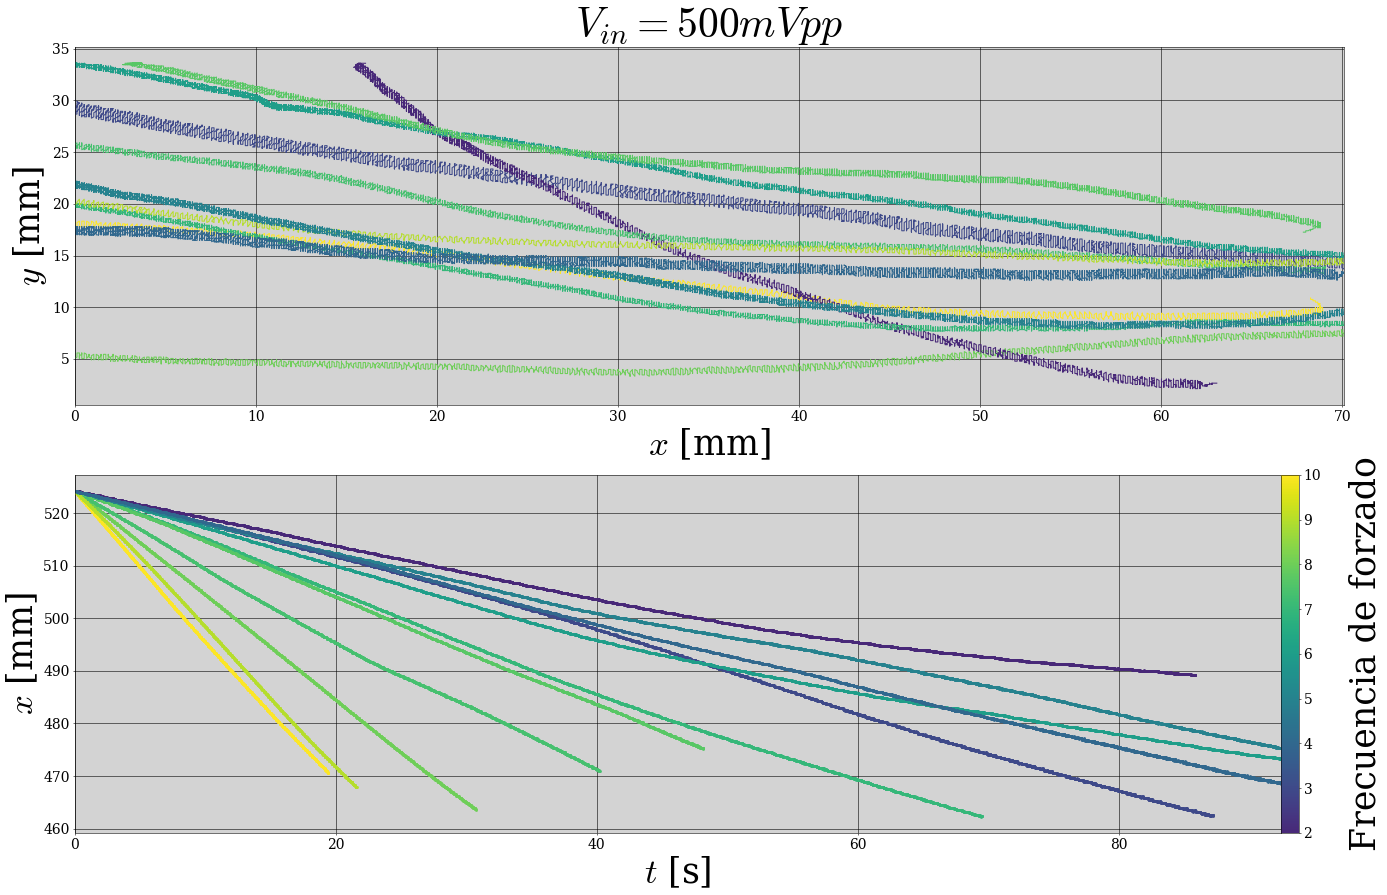

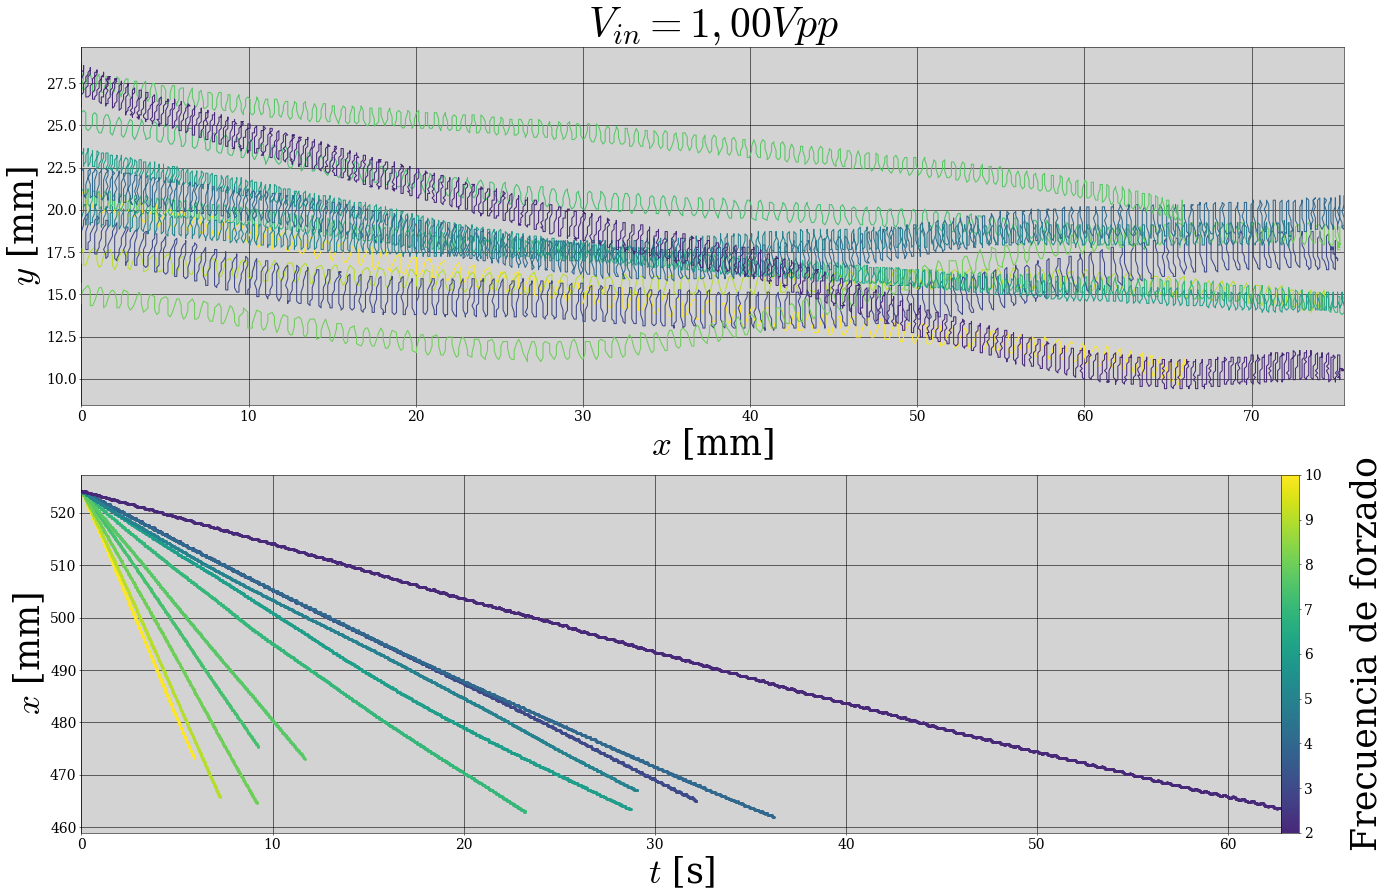

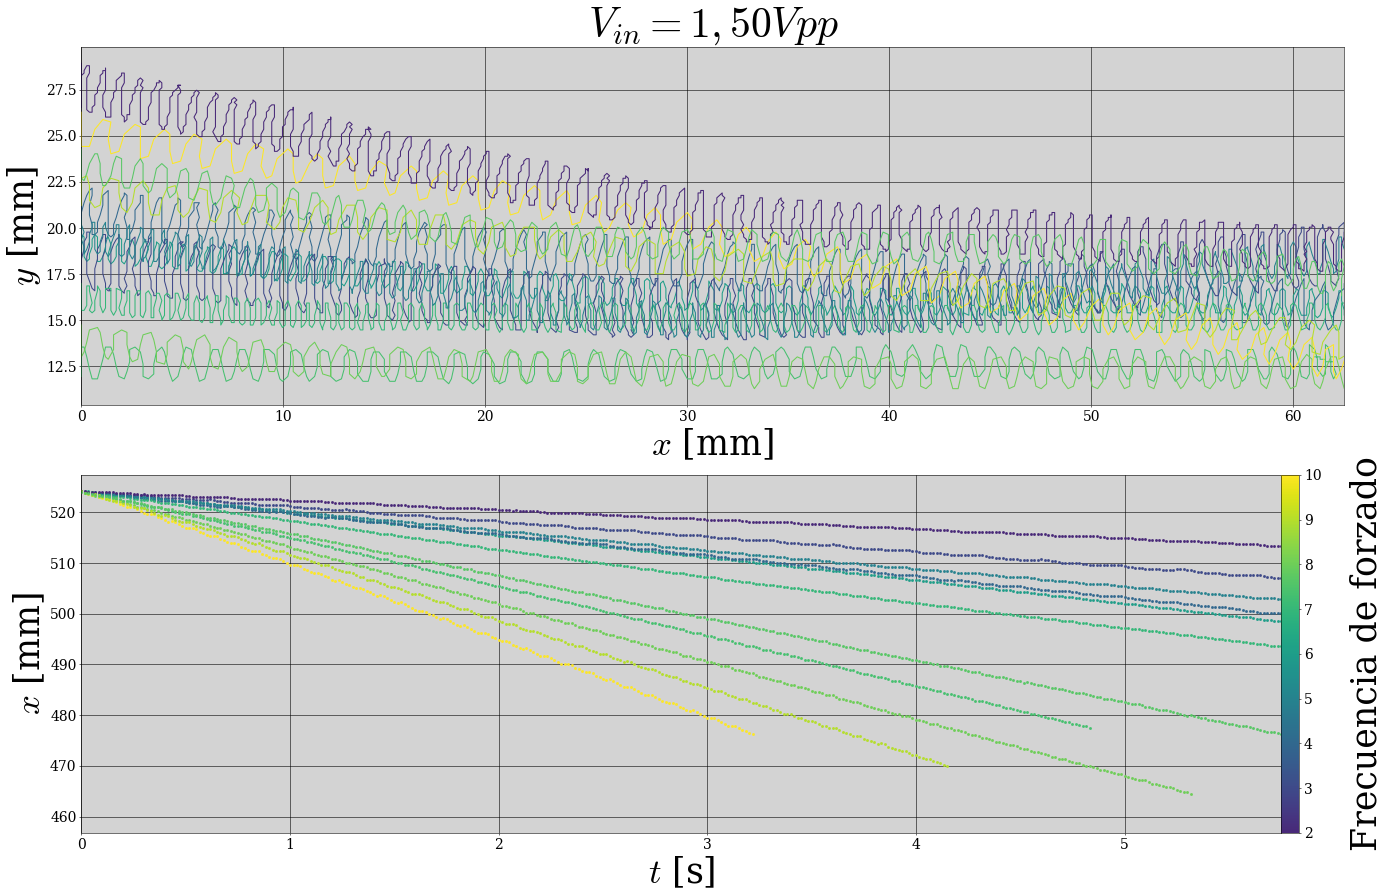

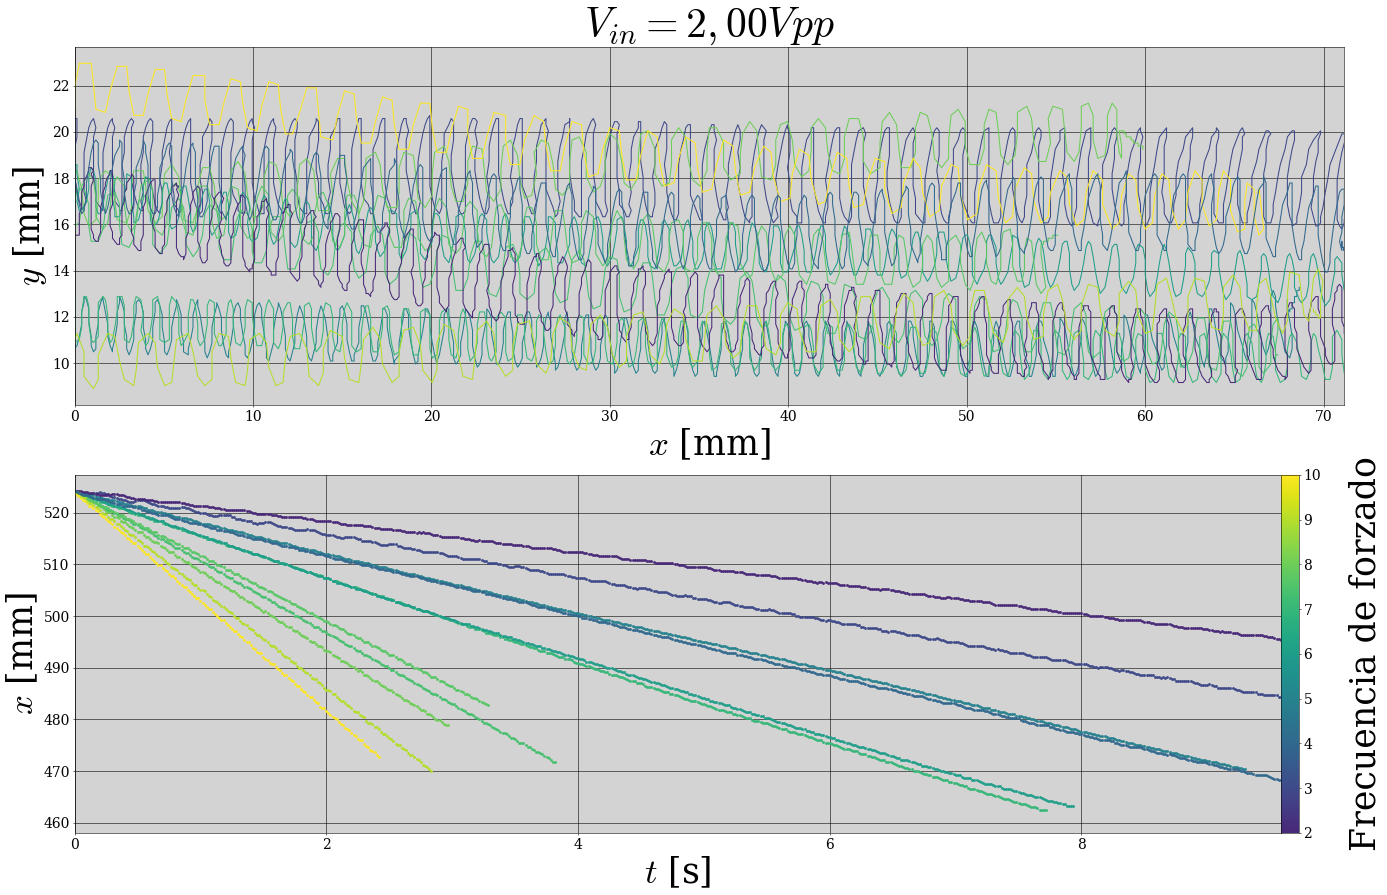

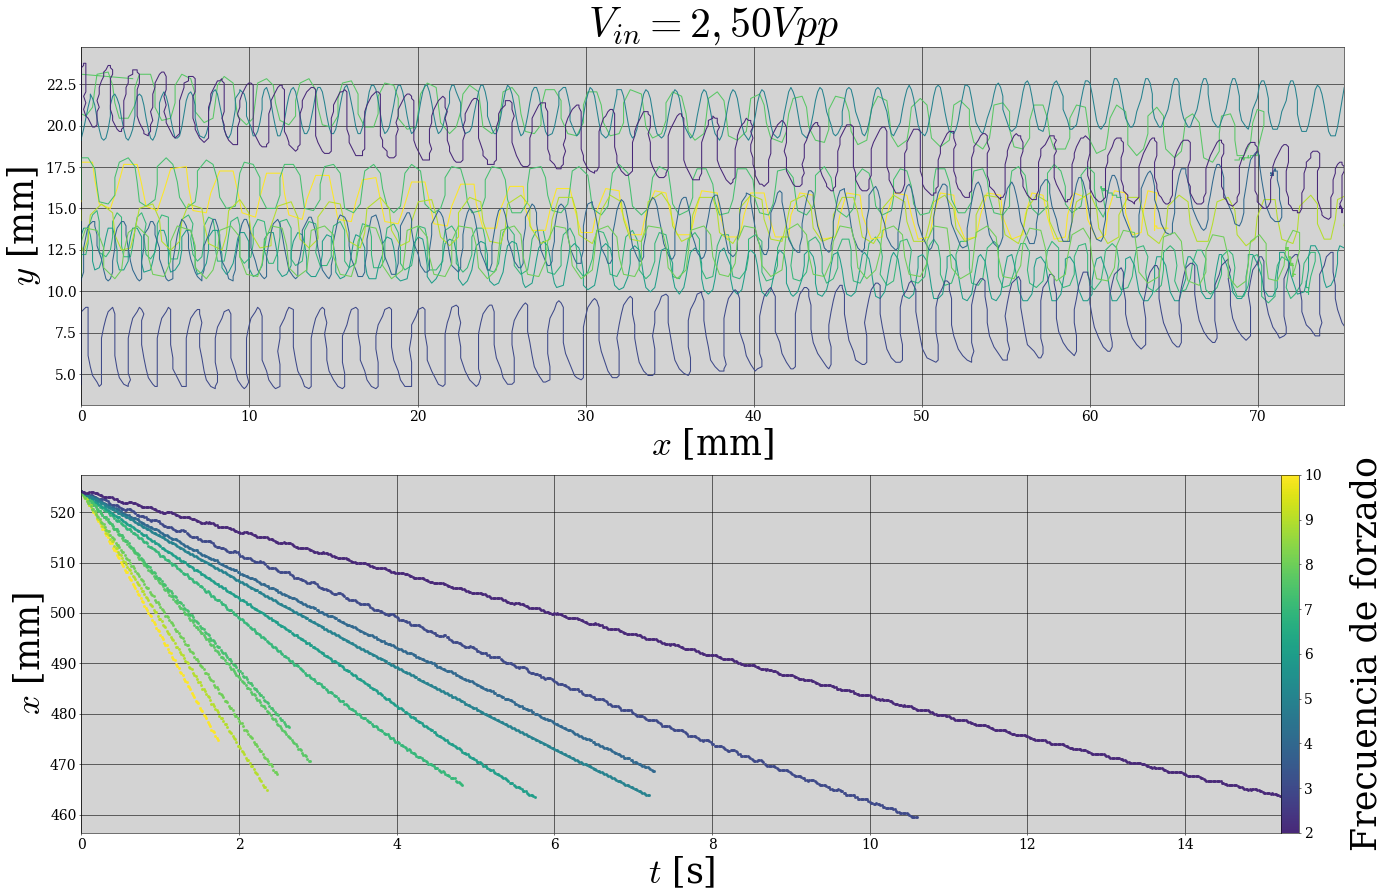

In [17]:
#Creating the colormap
norm = plt.Normalize(1,10)
cmap = plt.colormaps.get_cmap('viridis')
colorscale = plt.cm.ScalarMappable(norm, cmap)


currVolt_array = ['500mVpp', '1,00Vpp', '1,50Vpp', '2,00Vpp', '2,50Vpp']

for currVolt in currVolt_array:

    df_namelist = filenamelist[filenamelist['name'].str.contains(r'\b'+currVolt+r'\b')] #We get the filenames corresponding to the frecuency chosen
    filtered_namelist = df_namelist['name'] #We get the names of those files
    avg_start = np.average([i['x'][0] for i in  df]) #We compute the average x-position to make them run all from the same spot.

    #We plot everything on the same two plots
    fig, [ax1, ax2] = plt.subplots(2, 1)

    for filename in filtered_namelist:
        df_txy = df[ df_namelist[df_namelist['name']==filename].index[0] ] #We retrieve the dataframe corresponding to our current filename
    
        #We retrieve the metadata of our measurements from the filename
        s = filename.split('.')[0].split('-')
        v,f = s[0],s[1]
        vval = (float(v.split('V')[0].replace(',','.')) if 'mV' not in v else float(v.split('mV')[0].replace(',','.'))*1e-3)
        fval = float(f.split('Hz')[0].replace(',','.'))
        #We retrieve the data from our dataframe
        t,x,y = df_txy['t']/FRAME_PER_SECOND, df_txy['x']/PX_PER_MM, df_txy['y']/PX_PER_MM
        
        #We center our x-positions
        x_recentered = x - (x[0]-avg_start)
        
        #We remove the top of the x-movement
        nonconstant_indexs = np.where(x_recentered<=avg_start*0.98)[0]
        
        
        x_nonconstant = x_recentered[nonconstant_indexs]
        t_nonconstant = (t[nonconstant_indexs] - t[nonconstant_indexs[0]])
        
        #We take out the last part of the movement when the swimmer stops
        last_index = int(np.round(len(x_nonconstant)*0.9))
        t_nonconstant = t_nonconstant[:last_index]
        x_nonconstant = x_nonconstant[:last_index]

        # Save the non-constant values
        pd.DataFrame().assign(x = x_nonconstant).assign(t = t_nonconstant).to_csv(f'ECO20-45mm/slopes-xt/{currVolt}-{f}.csv', index = False)
        
        #Plotting
        ax1.plot(x, y, color = cmap(norm(fval)) )
        ax2.plot(t_nonconstant, x_nonconstant , '.', color = cmap(norm(fval)) )  
            
    #Colorbar configuration
    cbar_term = fig.colorbar(colorscale, ax=ax2, location='right', orientation='vertical', pad=0, fraction=0.05)
    cbar_term.ax.set_ylim(2,10)
    cbar_term.ax.ticklabel_format(axis='x',style='sci',scilimits=(0,2))
    cbar_term.ax.set_ylabel('Frecuencia de forzado',labelpad=40)

    #Axes configuration
    ax1.set_xlabel('$x$ [mm]')
    ax1.set_ylabel('$y$ [mm]')
    ax1.set_title(f'$V_{{in}}={currVolt}$')
    ax1.set_xlim([0,max(x)])

    ax2.set_xlabel('$t$ [s]')
    ax2.set_ylabel('$x$ [mm]')
    ax2.set_xlim([0,max(t_nonconstant)])

    fig.tight_layout()
    # fig.savefig(f'{currVolt}-comparacion.svg', bbox_inches='tight')
    # fig.savefig(f'{currVolt}-comparacion.png', bbox_inches='tight')